# **Distribution and Properties of Defects in Urban Drainage Systems**

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
# Initialize global variables
import config as cfg

## Load data

In [2]:
# Import the function that loads multiple sheets from an Excel file
from load_excel import load_multiple_sheets

# =============================================================================
# Load selected sheets from the Excel file into a dictionary of DataFrames
# -----------------------------------------------------------------------------
# - The user specifies which sheets to load by providing their names in the
#   'sheet_names' list.
# - Each sheet in the list must exist in the Excel file.
# =============================================================================
df_information = load_multiple_sheets(
    r"..\2.Data_validation\Validation_rules\Validated_data2.xlsx",
    sheet_names=["PIPES", "CCTV", "DEFECTS"]
)

# =============================================================================
# Extract each sheet into separate DataFrames for convenience
# -----------------------------------------------------------------------------
# These names (df_pipes, df_cctv, df_defects, df_hydraulic) are optional and
# depend on the user’s workflow. The user can assign any DataFrame they need
# using the keys returned in df_information.
# =============================================================================

df_pipes = df_information["PIPES"]
print(f"Loaded {len(df_pipes)} rows from 'PIPES'.")

df_cctv = df_information["CCTV"]
print(f"Loaded {len(df_cctv)} rows from 'CCTV'.")

df_defects = df_information["DEFECTS"]
print(f"Loaded {len(df_defects)} rows from 'DEFECTS'.")

df_hydraulic = None
if "HYDRAULIC_PROPERTIES" in df_information:
    df_hydraulic = df_information["HYDRAULIC_PROPERTIES"]
    print(f"Loaded {len(df_hydraulic)} rows from 'HYDRAULIC_PROPERTIES'.")

Loaded 227261 rows from 'PIPES'.
Loaded 3263 rows from 'CCTV'.
Loaded 23336 rows from 'DEFECTS'.


## Data preparation

In [3]:
from data_preparation import merge_df_pipes_hydraulic, filter_by_material, build_material_color_map, validate_factors, classify_pipe_factors, merge_cctv_defects, create_defect_color_map, validate_materials

### Merge hydraulic properties with pipes

In [5]:
if df_hydraulic is not None:
    # Merge hydraulic properties only if available
    df_pipes = merge_df_pipes_hydraulic(df_pipes, df_hydraulic)

### Select materials for analysis

In [6]:
# List of selected materials
cfg.selected_materials = ['AC', 'CONC', 'VC', 'PVC', 'PE']

# Validate that the selected materials are in the pipes dataframe
validate_materials(df_pipes)

# Filter pipes by selected material
df_pipes_filtered = filter_by_material(df_pipes)

The material selection was successful. The selected materials are: ['AC', 'CONC', 'VC', 'PVC', 'PE']
Pipes selected: 219938


### Create color map for selected materials

In [8]:
# Default colors
cfg.colors_paper = {
    'VC':   '#299729',
    'AC':   '#FF6B4A',
    'PE':   '#84B3D6',
    'CONC': '#FFB347',
    'PVC':  '#9467bd',
}

# Set color map for materials
cfg.colors_materials = build_material_color_map()

### Select factors for analysis

In [10]:
#List of selected factors
cfg.factors = ['Material', 'Sewage_type', 'Sewer_category', 'Installation_year',
 'Diameter', 'Pipe_length', 'Depth', 'Slope']

# Validate that the factors exist in the dataframes
cfg.factors = validate_factors(df_pipes_filtered)

The factors were successfully selected. Selected factors: ['Material', 'Sewage_type', 'Sewer_category', 'Installation_year', 'Diameter', 'Pipe_length', 'Depth', 'Slope']


### Classify factors into numerical and categorical

Automatic classification into numerical and categorical factors. If you want to change this classification manually, write the list of numerical factors in `numeric_factors_override` and the categorical ones in `categorical_factors_override`.

In [11]:
# Function to classify factors
cfg.factors_num, cfg.factors_cat = classify_pipe_factors(df_pipes, numeric_factors_override=None, categorical_factors_override=None)

Classification:
Numeric factors: ['Installation_year', 'Diameter', 'Pipe_length', 'Depth', 'Slope']
Categorical factors: ['Material', 'Sewage_type', 'Sewer_category']


### Merge pipes factors with cctv and defects dataframes

In [12]:
# Merge function
df_cctv_filtered, df_defects_filtered = merge_cctv_defects(df_cctv, df_pipes_filtered, df_defects)

### Create color map for defects

In [13]:
# Default color palette for defect codes
cfg.palette_defects_final = {
    'JF': '#08306b',
    'DP': '#08519c',
    'RI': '#2171b5',
    'ED': '#4292c6',
    'DG': '#6baed6',
    'CL': '#00441b',
    'LF': '#006d2c',
    'CM': '#238b45',
    'LX': '#41ae76',
    'CC': '#66c2a4',
    'DE': '#99d8c9',
    'JD': '#a63603',
    'OP': '#d94801',
    'LP': '#fd8d3c',
    'PF': '#feb24c',
    'SD': '#fdd49e',
    'JO': '#3f007d',
    'PH': '#54278f',
    'IP': '#6a51a3',
    'DF': '#807dba',
    'PB': '#67000d',
    'TM': '#a50f15',
    'BDE': '#cb181d',
    'EX': '#ef3b2c',
    'MHJ': '#fb6a4a',
    'OT': '#8c510a',
    'PL': '#bf812d',
    'PX': '#dfc27d',
    'SV': '#f6e8c3',
}

cfg.palette_defects_final = create_defect_color_map(df_defects, Defect_code_col="Defect_code")
# Add the category 'Others' to the list
if 'Others' not in cfg.palette_defects_final:
    cfg.palette_defects_final['Others'] = cfg.palette_defects_final.get('Others', '#999999')

## Dataset description

In [14]:
from dataset_description import combined_summary_two_tables, analyze_ecdf_by_material, plot_boxplots_grid

### Statistics summary table

In [15]:
# Create the summaries for numerical and categorical variables
summary_num, summary_cat = combined_summary_two_tables(df_cctv_filtered, df_pipes_filtered)
# Display the summaries
display(summary_num)
display(summary_cat)

,variable,dataset,count,mean,std,min,median,max
4,Installation_year,Network,216943.0,1980.277312,27.494075,1.900000e+03,1978.000000,2024.000000
5,Installation_year,CCTV,3098.0,1971.930278,23.361564,1.903000e+03,1970.000000,2021.000000
2,Diameter,Network,219705.0,169.743847,102.019057,1.000000e+02,150.000000,2591.000000
3,Diameter,CCTV,3149.0,174.220387,68.280899,1.000000e+02,150.000000,750.000000
6,Pipe_length,Network,219790.0,37.127535,28.459127,6.000000e-01,31.210000,2957.750000
7,Pipe_length,CCTV,3149.0,43.285014,25.746674,1.220000e+00,39.330000,200.200000
0,Depth,Network,188071.0,2.092280,1.132702,3.430000e-07,1.874000,14.995999
1,Depth,CCTV,2917.0,2.027295,1.187802,8.001404e-03,1.840499,13.441999
8,Slope,Network,183453.0,4.581676,5.153312,1.880053e-03,2.531145,30.000000
9,Slope,CCTV,2859.0,5.142413,5.606109,1.239840e-02,3.052729,29.882604


,variable,dataset,summary
0,Material,Network,"PVC (39.6%), AC (28.3%), VC (20.2%), CONC (8.5..."
1,Material,CCTV,"AC (34.7%), PVC (32.8%), VC (20.1%), CONC (6.0..."
2,Sewage_type,Network,Comb (100.0%)
3,Sewage_type,CCTV,"Comb (96.5%), NaN (3.5%)"
4,Sewer_category,Network,"Waste (96.4%), Comb (1.8%), NI (0.6%), WI (0.5..."
5,Sewer_category,CCTV,"Waste (88.4%), Comb (8.0%), NaN (3.5%), OM (0...."


### Statistic distribution of CCTV and Pipes

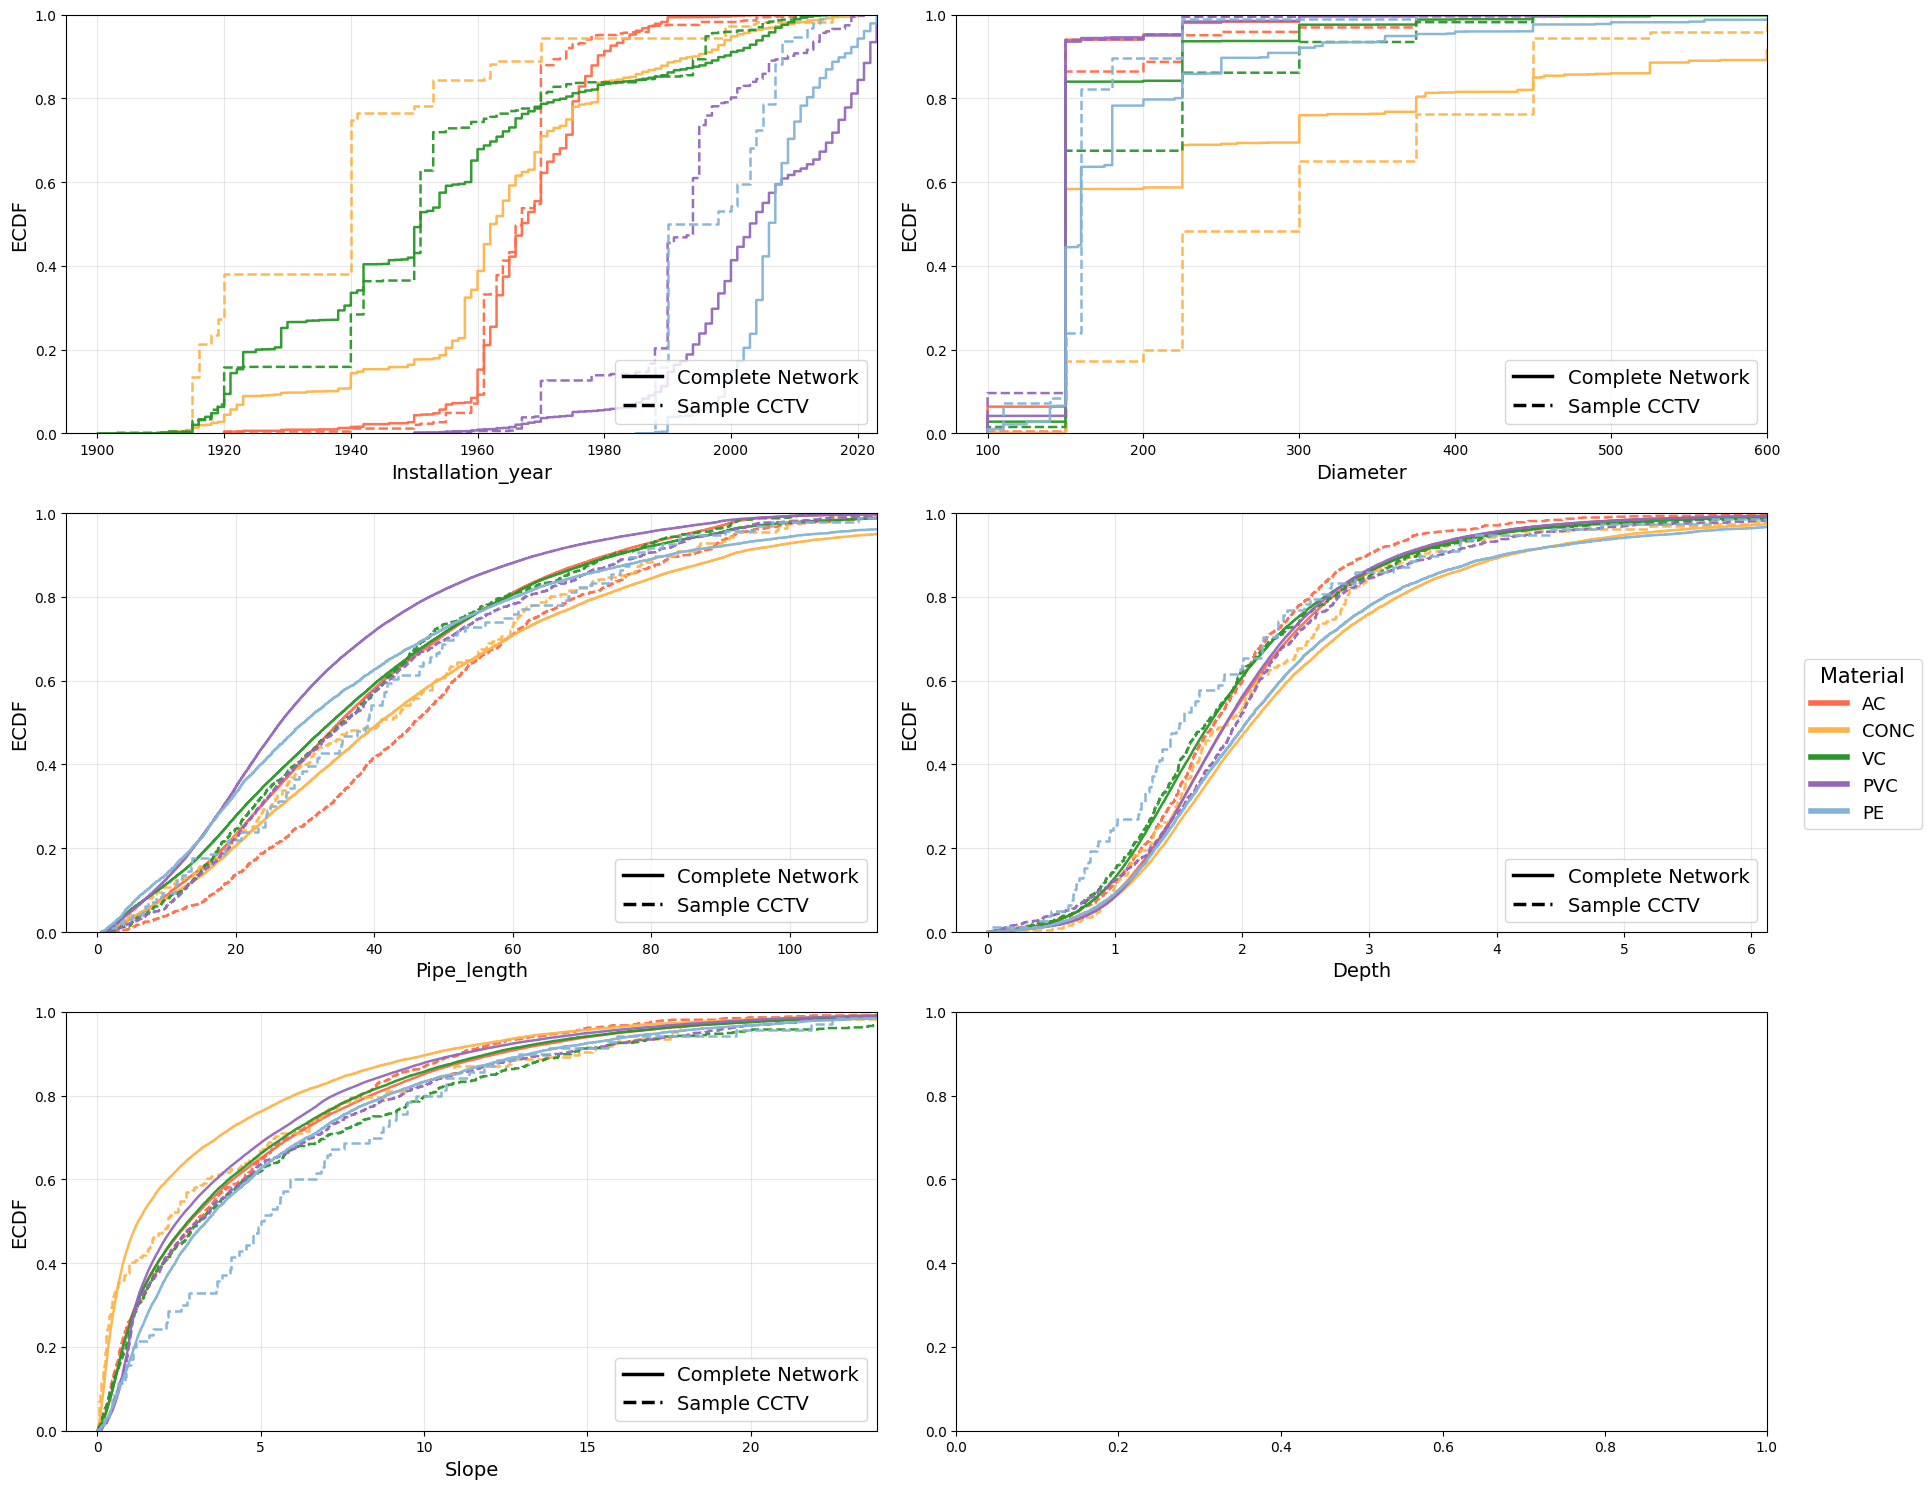

In [16]:
# Run the function
summary_table = analyze_ecdf_by_material(
    df_population=df_pipes_filtered,
    df_sample=df_cctv_filtered,
    material_col="Material"
)

# # Organize display results
# summary_table['Variable'] = pd.Categorical(
#     summary_table['Variable'],
#     ordered=True
# )
summary_table = summary_table.sort_values('Variable')

### Boxplots

C:\Users\Juana\OneDrive - The University of Auckland\8. Watercare\11. Code_PhD\3.Defects_description\dataset_description.py:405: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Juana\OneDrive - The University of Auckland\8. Watercare\11. Code_PhD\3.Defects_description\dataset_description.py:405: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Juana\OneDrive - The University of Auckland\8. Watercare\11. Code_PhD\3.Defects_description\dataset_description.py:405: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Juana\OneD

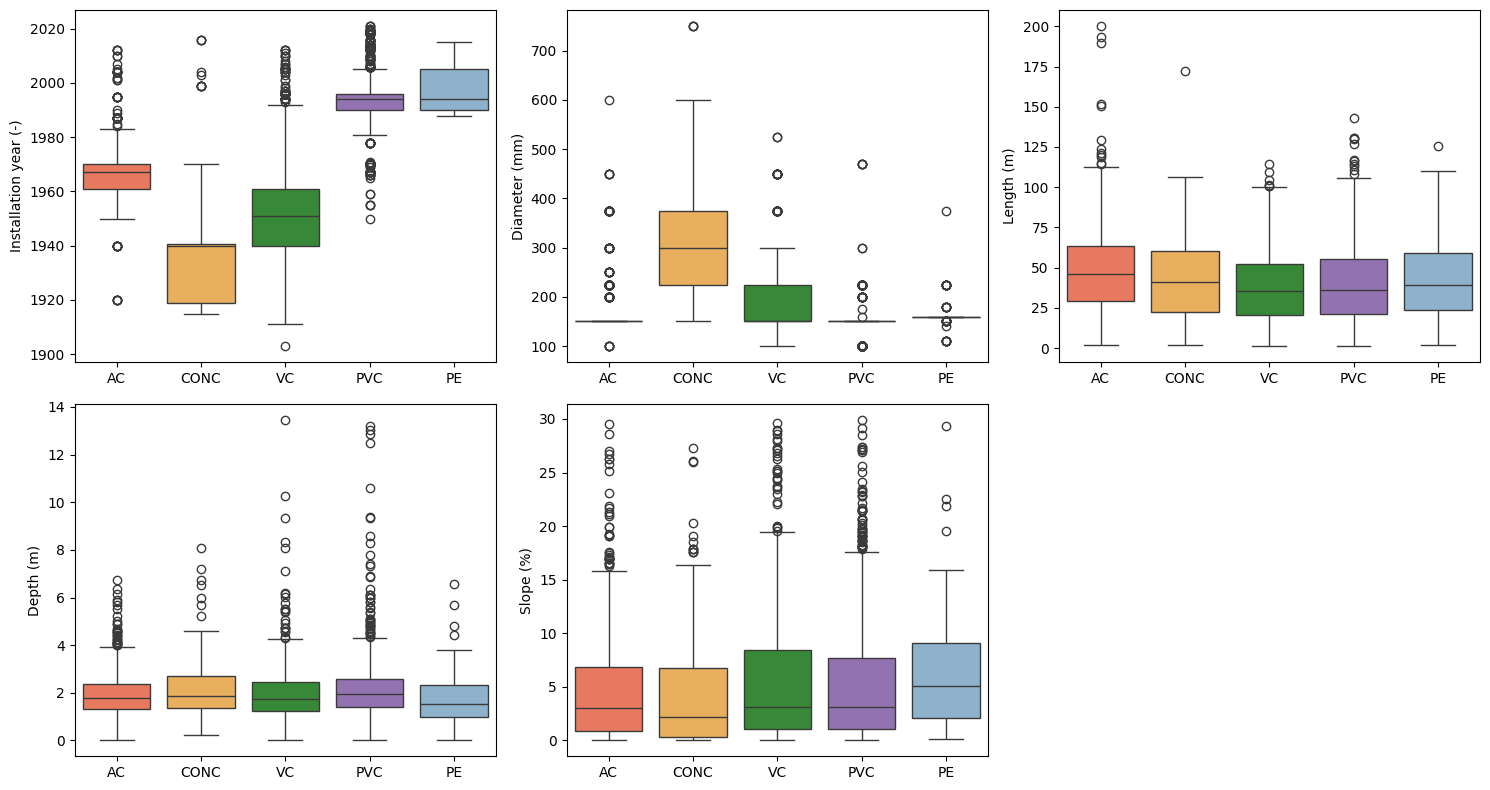

In [17]:
plot_boxplots_grid(df_cctv_filtered, [col for col in cfg.factors_num if col != 'Dry_peak_flow_rate'], group_col="Material")

## Defect  general description

In [18]:
from defect_general_description import plot_defects_summary_side_by_side, plot_defects_stacked_with_others

### Number of defects per km and per pipe

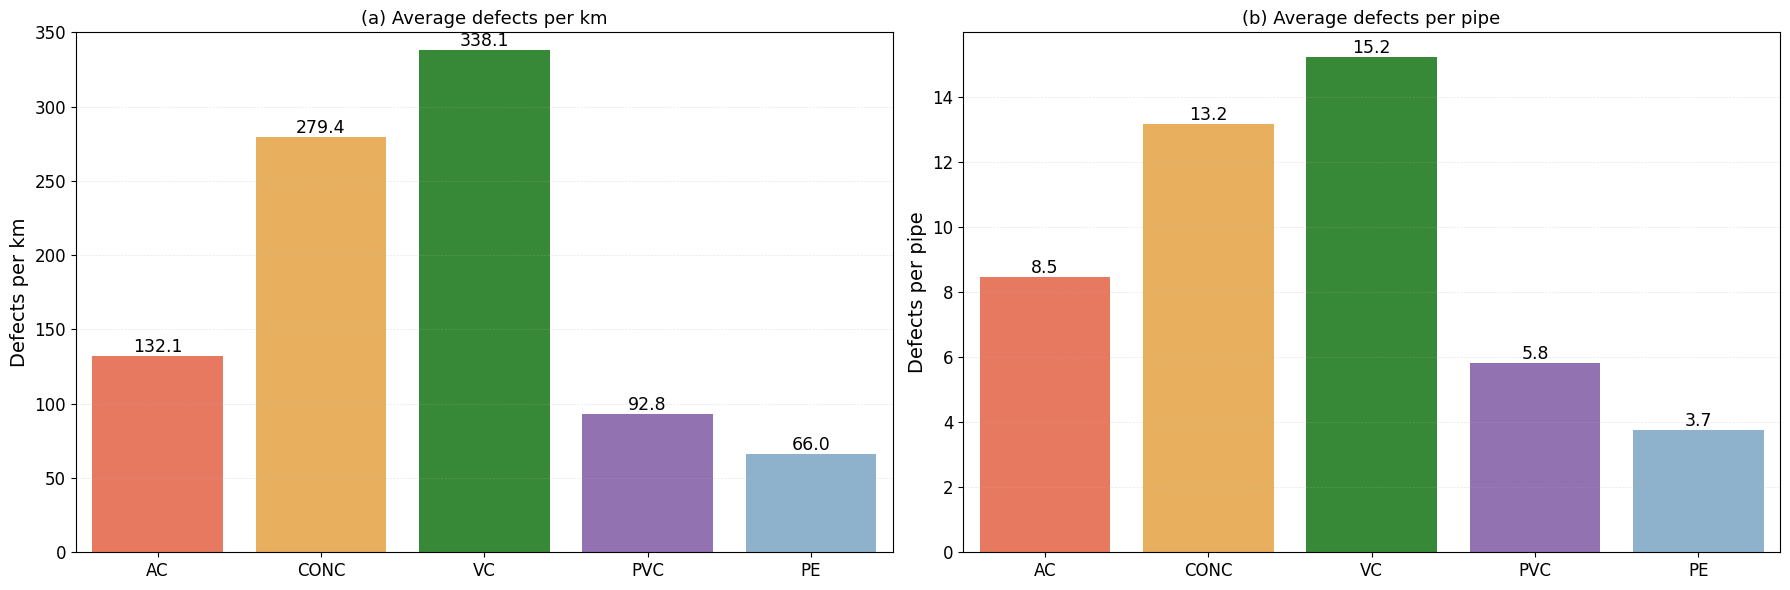

In [19]:
# Plot figure
plot_defects_summary_side_by_side(
    df_defects_filtered=df_defects_filtered,
    df_cctv_filtered=df_cctv_filtered
)

### Distribution of type of defects

### Table of Defect Types

To understand the characteristics and different types of defects, the following table provides a summary of defect codes, their descriptions, and the related properties.

| Code | Defect name | Description | SZ. | E. | C.L. |
|:-----|:-------------|:-------------|:----:|:----:|:----:|
| BDE | Pipe Blocked (with debris) | Deposits of silt, sand, mud, or gravel in the pipe that reduces the diameter in more than 50%. |  |  |  |
| CC | Cracking Circumferential | Cracking at right angles to the pipe axis. | X |  | X |
| CL | Cracking Longitudinal | Cracking parallel to the pipe axis. | X | X | X |
| CM | Cracking Multiple | Cracking in multiple directions. | X | X | X |
| DE | Debris Silty | Deposits of silt, sand, mud, or gravel in the pipe. | X | X | X |
| DF | Deformed Pipe | Deformation in rigid pipe. | X | X | X |
| DG | Debris Greasy | Fat, scale, and other adhering material. | X | X | X |
| DP | Dipped Pipe | Sag in the pipe causing water to pond. | X | X | X |
| ED | Encrustation Deposits | Deposits from evaporated groundwater with dissolved salts/minerals. | X | X | X |
| EX | Exfiltration | Visible flow of water out of the pipe. |  |  |  |
| IP | Infiltration Present | Visible infiltration through a pipe defect. | X |  | X |
| JD | Joint Displaced | Pipe segments have a vertical or horizontal displacement relative to each other. | X |  |  |
| JF | Joint Faulty | Sealing or physical joint defects. | X |  | X |
| JO | Joint Open | Pipe segments are displaced longitudinally. | X |  |  |
| LF | Lateral Faulty | Joint sealing defects or physical damage to lateral connections. | X |  |  |
| LP | Lateral Protruding | Pipe is protruding into the inspected pipe. | X |  |  |
| LX | Lateral Problem | Defects in the lateral pipe. |  |  |  |
| MHJ | Manhole Joint Faulty | The bond between the pipe and manhole is faulty. |  |  | X |
| OP | Obstruction Permanent | Fixed object causing obstruction. | X |  | X |
| OT | Obstruction Temporary | Potentially removable obstruction. | X |  | X |
| PB | Pipe Broken | Pipe broken into blocks by cracks forming a mosaic pattern. | X | X | X |
| PF | Deformed Plastic Pipe | Deformation in plastic pipe. | X | X | X |
| PH | Pipe Holed | Hole made in the pipe. | X |  | X |
| PL | Protective Lining Defective | The lining of a pipe is defective. | X | X | X |
| PX | Pipe Collapsed | Complete structural failure. | X |  |  |
| RI | Root Intrusion | Tree roots entering the pipe through a defect. |  | X | X |
| SD | Surface Damage | Damage in the inside surface of the pipe. | X | X | X |
| SV | Soil Visible | The soil is visible through a defect. |  |  | X |
| TM | Tomo | Cavity outside the pipe is visible through a defect. |  |  | X |


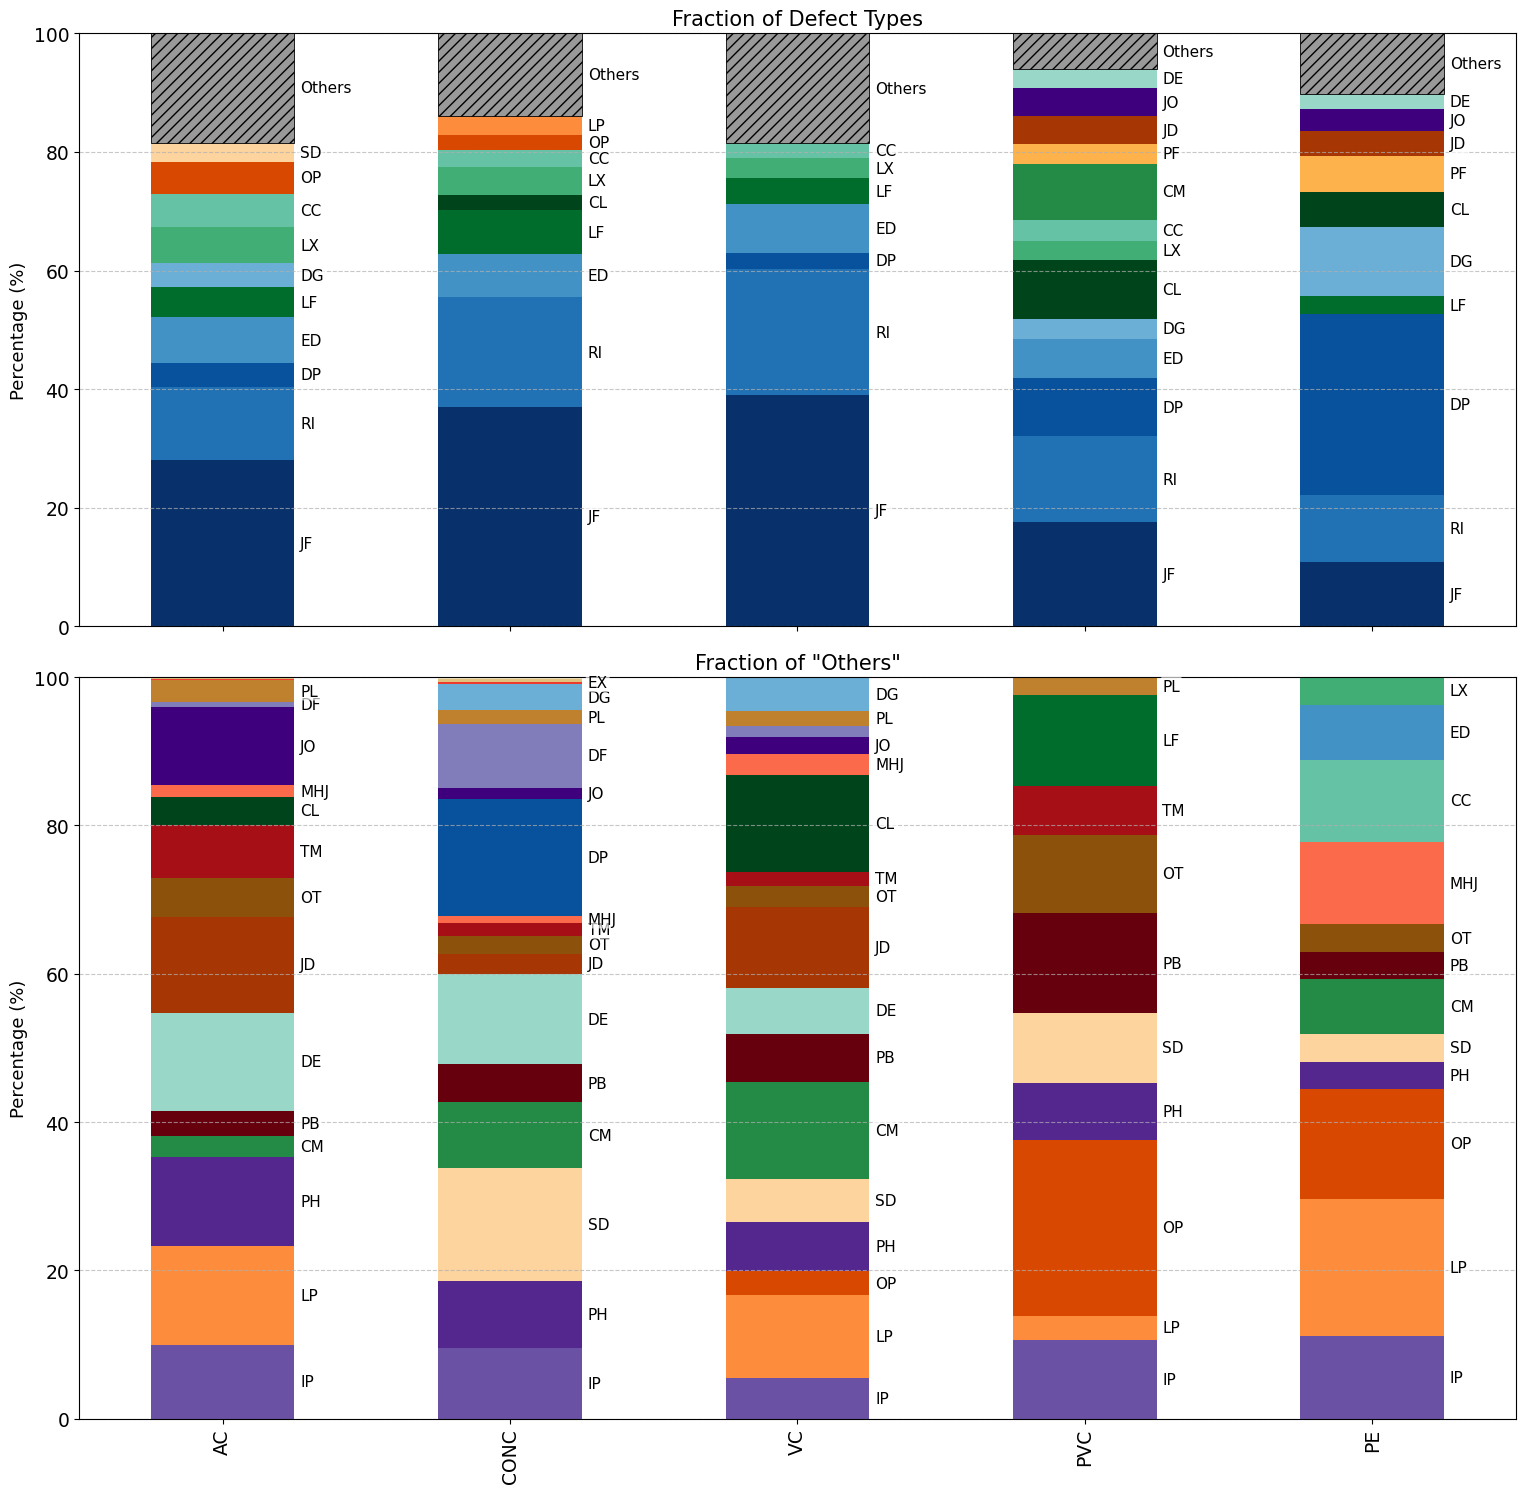

In [20]:
plot_defects_stacked_with_others(df_defects_filtered,threshold=2.5, color=cfg.palette_defects_final)

## Defect properties description

In [21]:
from defect_properties_description import plot_defect_size_bars, plot_defect_heatmaps_longitudinal, plot_defect_density_extent_horizontal, plot_defect_position_heatmaps

### Size

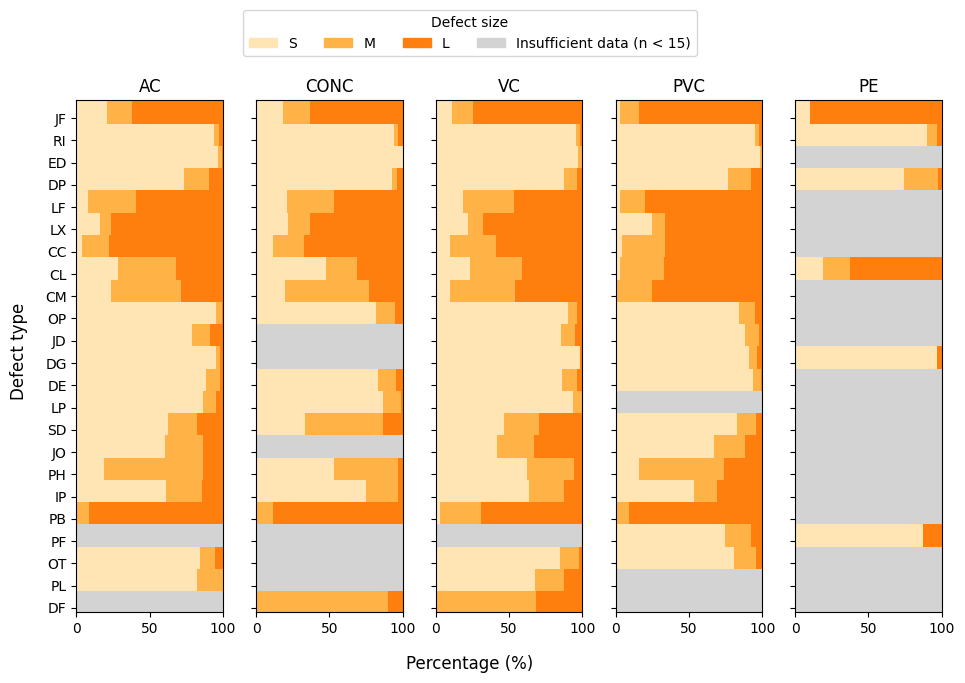

In [22]:
#Plot defect size distribution per material
plot_defect_size_bars(df=df_defects_filtered, min_count = 15, figsize = (2,6))

### Longitudinal distance

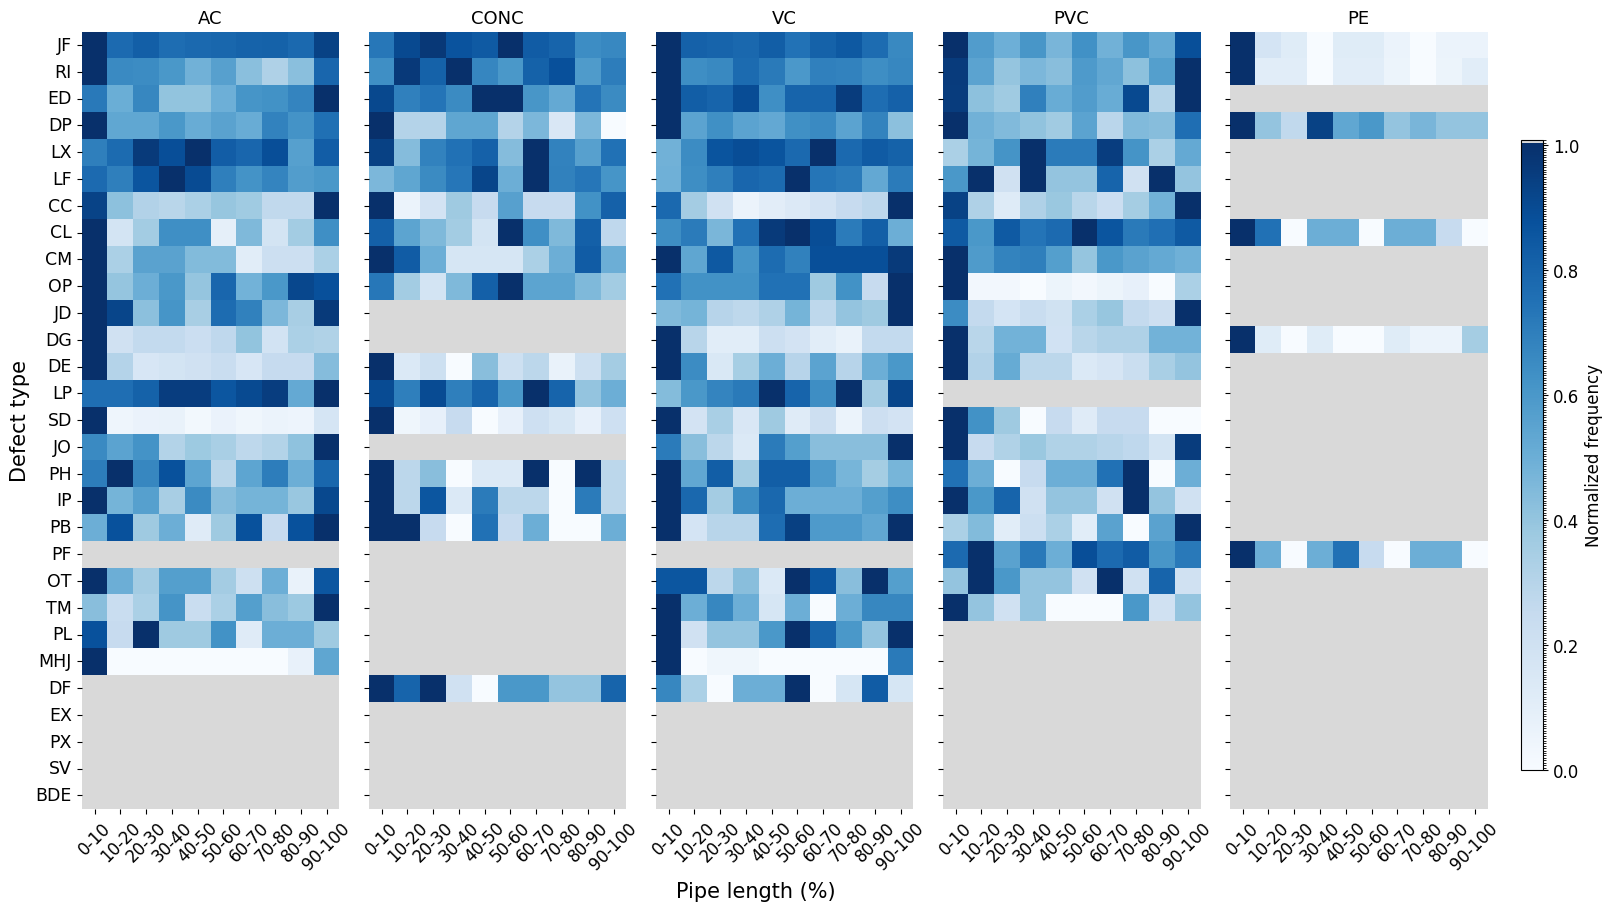

In [23]:
plot_defect_heatmaps_longitudinal(df_defects_filtered)

### Extent

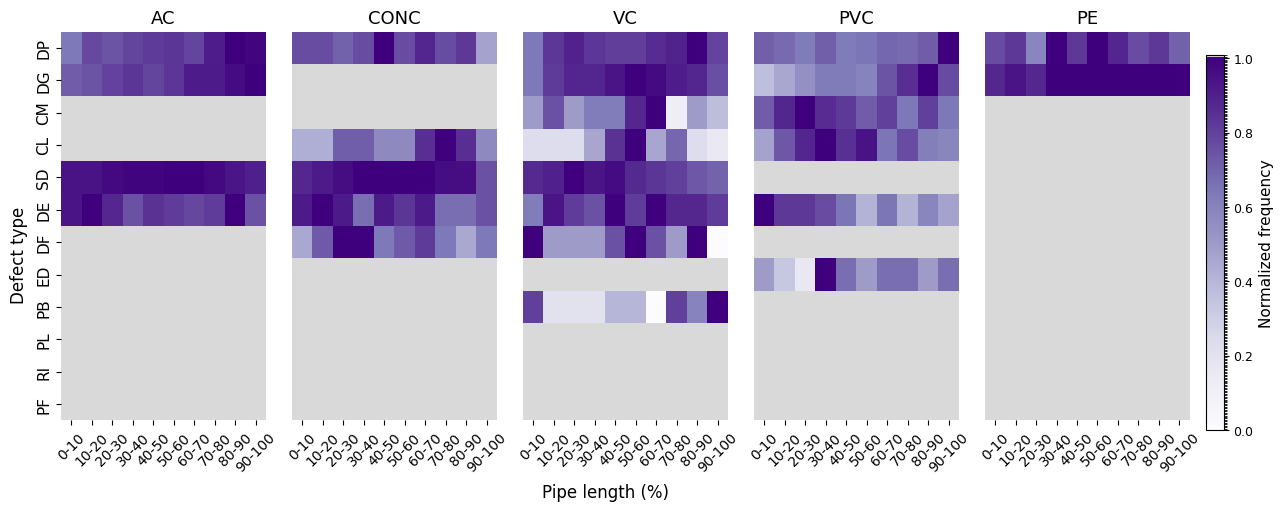

In [24]:
plot_defect_density_extent_horizontal(df_defects_filtered)

### Clock reference position

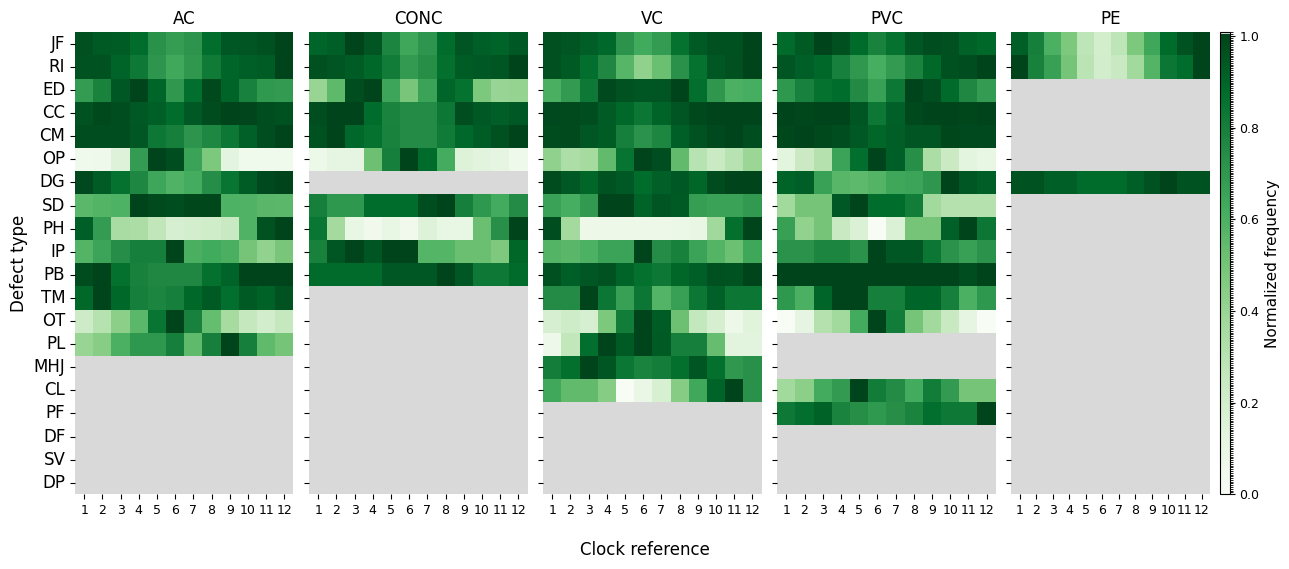

In [25]:
plot_defect_position_heatmaps(df=df_defects_filtered)

## Defect correlation

In [26]:
from defect_correlation import plot_defect_type_correlation

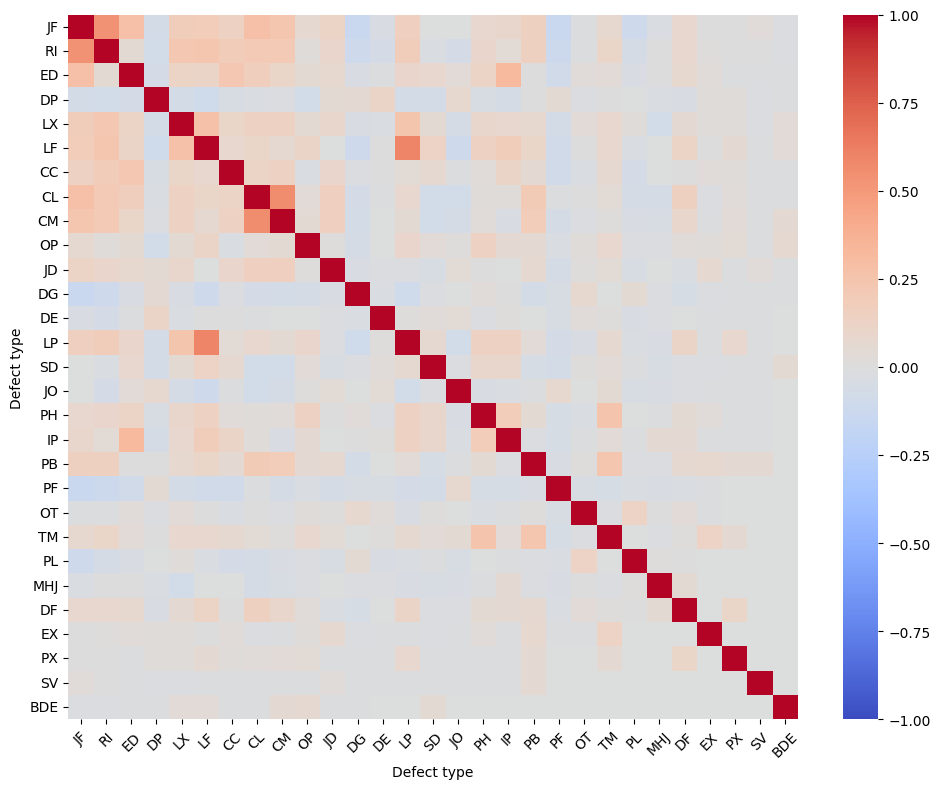

In [27]:
plot_defect_type_correlation(df_defects_filtered)